<a href="https://colab.research.google.com/github/GloryKO/FashionClassificationCNN/blob/main/Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING THE DATASET**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
fashion_test_dir= r"test.csv"
fashion_train_dir= r"train.csv"
fashion_train_df = pd.read_csv(fashion_train_dir,sep =',')
fashion_test_df = pd.read_csv(fashion_test_dir,sep =',')


**DATA VISUALIZATION**

In [3]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.shape

(60000, 785)

In [6]:
fashion_test_df.shape

(10000, 785)

In [7]:
training = np.array(fashion_train_df,dtype='float32')
testing = np.array(fashion_test_df,dtype='float32')


6.0

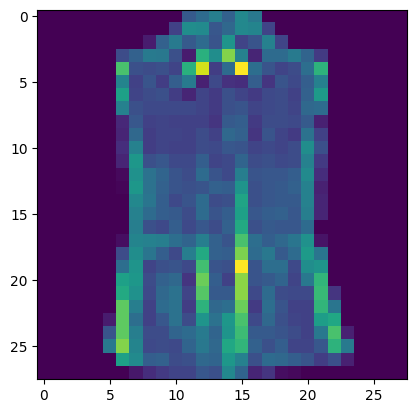

In [8]:
import random
i = random.randint(1,500)
plt.imshow(training[i,1:].reshape(28,28))#showing a random training row and getting all columns except the first
label = training[i,0]
label

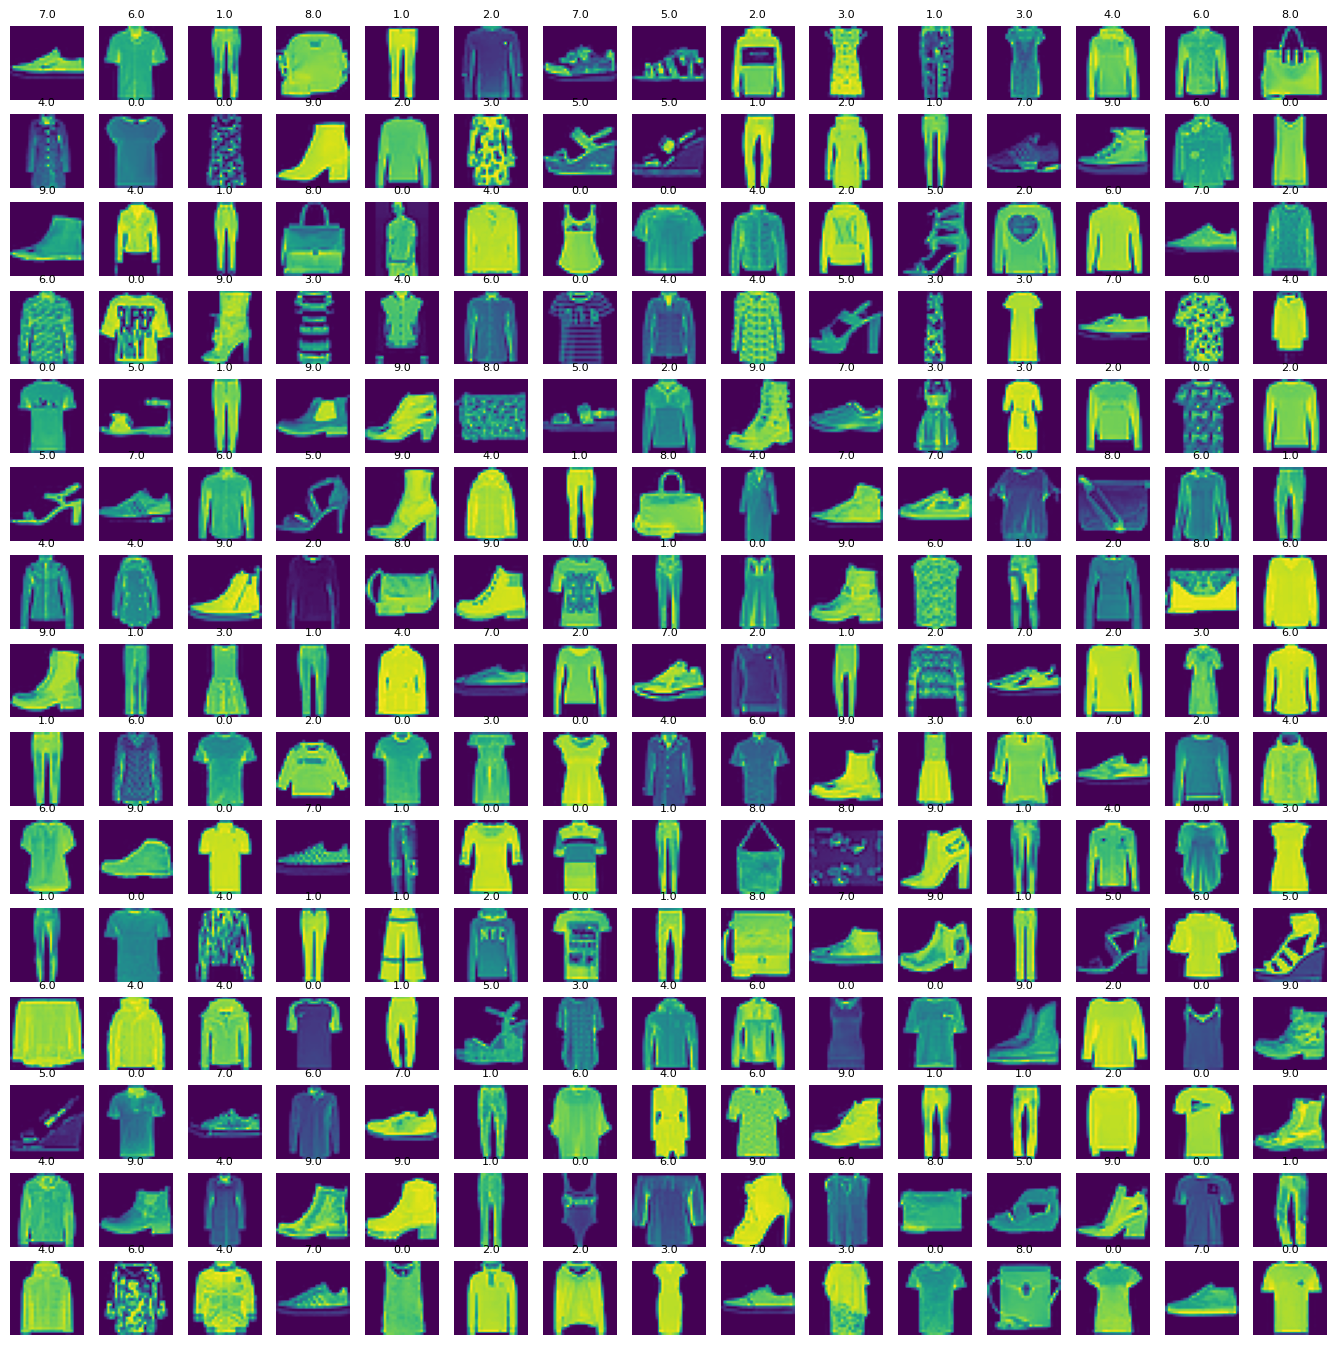

In [9]:
#viewing more images in a grid format
W_grid = 15
L_grid = 15
fig , axes = plt.subplots(L_grid,W_grid,figsize=(17,17))
axes = axes.ravel() #flatten 15 * 15 array into 255
n_training = len(training)

for i in np.arange(0,L_grid*W_grid):
  index = np.random.randint(0,n_training) #get a random number between zero and the length of the training data 
  axes[i].imshow(training[index,1:].reshape(28,28))
  axes[i].set_title(training[index,0],fontsize=8)
  axes[i].axis('off')
#plt.subplots_adjust(hspace=0.4)

**MODEL TRAINING**

In [10]:
x_train = training[:,1:]/255
y_train = training[:,0]
x_test = testing[:,1:]/255
y_test = testing[:,0]


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size=0.2,random_state=12345)

In [12]:
x_train = x_train.reshape(x_train.shape[0],*(28,28,1))
x_test =x_test.reshape(x_test.shape[0],*(28,28,1))
x_validate =x_validate.reshape(x_validate.shape[0],*(28,28,1))

In [13]:
x_train.shape
x_validate.shape
x_test.shape


(10000, 28, 28, 1)

In [14]:
x_validate.shape

(12000, 28, 28, 1)

In [15]:
x_train.shape

(48000, 28, 28, 1)

In [16]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam 
from keras.callbacks import TensorBoard

cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation='relu')) #first arg is the number of filte(kernel or fetaure maps in the dimension o 3b3)
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 32,activation='relu')) #the layer between the input and output layer
cnn_model.add(Dense(units = 10,activation='sigmoid')) #we use the sigmoid function since we need to specify only one of the 10 classes
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])


In [17]:
epochs = 50

In [18]:
cnn_model.fit(x_train,y_train,batch_size=512,verbose=1,epochs = epochs,validation_data=(x_validate,y_validate))

Epoch 1/50
94/94 [==============================] - 4s 32ms/step - loss: 0.7564 - accuracy: 0.7231 - val_loss: 0.5394 - val_accuracy: 0.7997
Epoch 2/50
94/94 [==============================] - 3s 29ms/step - loss: 0.4778 - accuracy: 0.8250 - val_loss: 0.4632 - val_accuracy: 0.8257
Epoch 3/50
94/94 [==============================] - 3s 28ms/step - loss: 0.4277 - accuracy: 0.8420 - val_loss: 0.4150 - val_accuracy: 0.8482
Epoch 4/50
94/94 [==============================] - 4s 41ms/step - loss: 0.4045 - accuracy: 0.8530 - val_loss: 0.4179 - val_accuracy: 0.8458
Epoch 5/50
94/94 [==============================] - 3s 28ms/step - loss: 0.3889 - accuracy: 0.8557 - val_loss: 0.3941 - val_accuracy: 0.8561
Epoch 6/50
94/94 [==============================] - 3s 29ms/step - loss: 0.3733 - accuracy: 0.8618 - val_loss: 0.3922 - val_accuracy: 0.8535
Epoch 7/50
94/94 [==============================] - 3s 28ms/step - loss: 0.3593 - accuracy: 0.8688 - val_loss: 0.3764 - val_accuracy: 0.8623
Epoch 8/50
94

**MODEL EVALUATION**

In [19]:
evaluation = cnn_model.evaluate(x_test,y_test)
print("Test Accuracy : {:.3f}".format(evaluation[1]))


313/313 [==============================] - 1s 2ms/step - loss: 0.4042 - accuracy: 0.8739
Test Accuracy : 0.874


In [28]:
import numpy as np

# Predict the probabilities for each class for the test data
probabilities = cnn_model.predict(x_test) #called the predict function to get the predicted probabilities for each class 
#then convert them back to class labels using numpy
predicted_labels = np.argmax(probabilities,axis=-1)
predicted_labels

313/313 [==============================] - 1s 2ms/step


array([0, 1, 2, ..., 8, 8, 1])

313/313 [==============================] - 1s 2ms/step


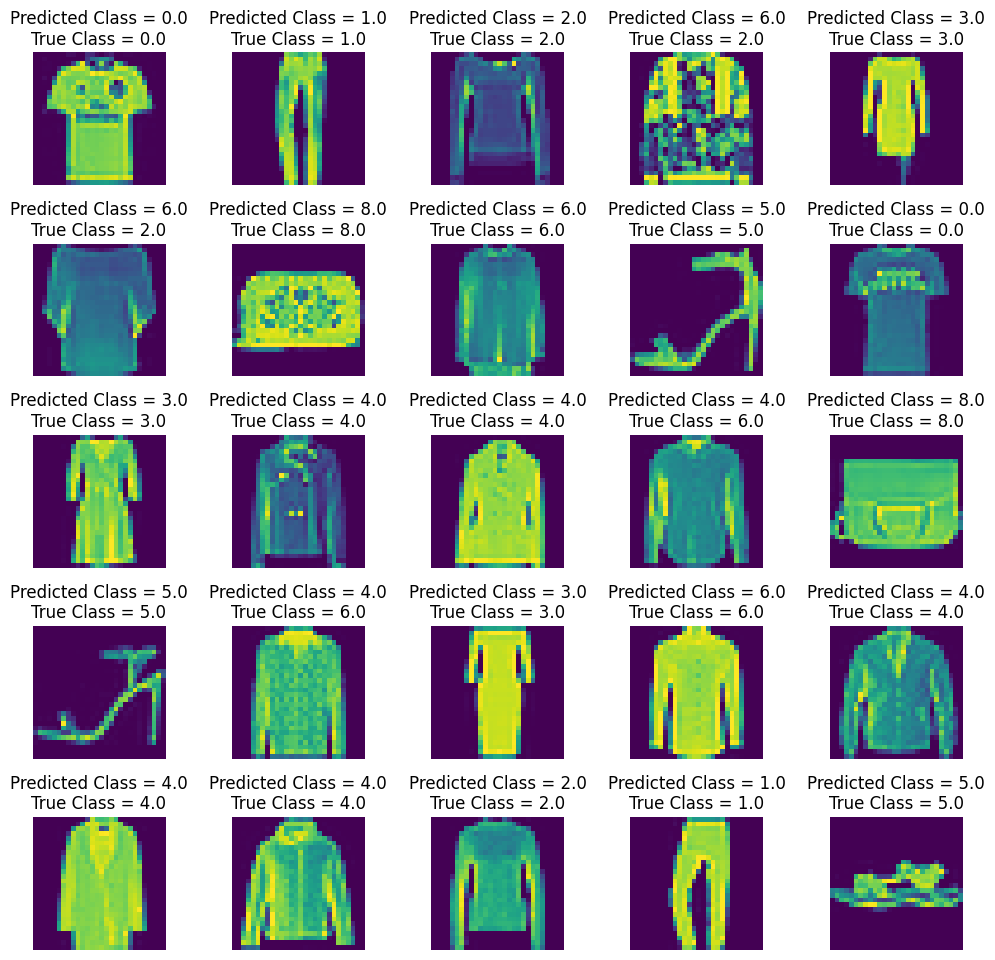

In [29]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

# Predict the probabilities for each class for the test data
probabilities = cnn_model.predict(x_test)

for i in range(L * W):
    # Get the predicted class label
    predicted_label = np.argmax(probabilities[i])

    # Display the image and predicted and true labels
    axes[i].imshow(x_test[i].reshape(28, 28))
    axes[i].set_title("Predicted Class = {:0.1f}\nTrue Class = {:0.1f}".format(predicted_label, y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)



<Axes: >

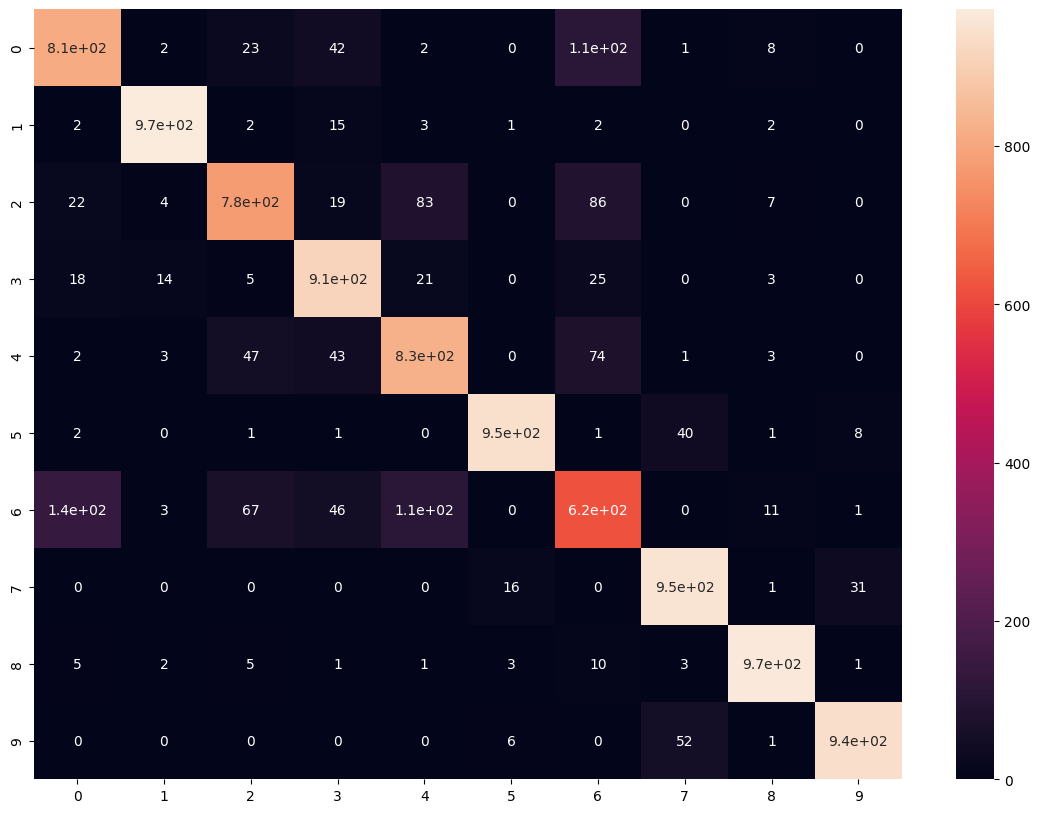

In [30]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted_labels)
plt.figure(figsize=(14,10))
sns.heatmap(cm,annot=True) 
#sum the diagonal elements to get the total true correct values

In [36]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Classes {}".format(i) for i in range(num_classes)]
print(classification_report(y_test,predicted_labels,target_names=target_names))

              precision    recall  f1-score   support

   Classes 0       0.81      0.81      0.81      1000
   Classes 1       0.97      0.97      0.97      1000
   Classes 2       0.84      0.78      0.81      1000
   Classes 3       0.85      0.91      0.88      1000
   Classes 4       0.79      0.83      0.81      1000
   Classes 5       0.97      0.95      0.96      1000
   Classes 6       0.67      0.62      0.65      1000
   Classes 7       0.91      0.95      0.93      1000
   Classes 8       0.96      0.97      0.97      1000
   Classes 9       0.96      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

